In [1]:
# Install essential Python libraries for data analysis, machine learning, and visualization:
# - pandas: Data manipulation and analysis
# - matplotlib: Static plotting and visualization
# - plotly: Interactive plotting and dashboarding
# - scikit-learn: Machine learning algorithms and tools
# - jupyter: Interactive notebooks for code, visualization, and documentation
# - seaborn: Statistical data visualization built on top of matplotlib
!pip install pandas matplotlib plotly scikit-learn jupyter seaborn

In [2]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd  # Pandas is used for data manipulation and analysis, particularly for working with data in DataFrame structures.
import numpy as np  # NumPy is used for numerical operations, including working with arrays and performing mathematical functions.
import matplotlib.pyplot as plt  # Matplotlib is a plotting library used for creating static, animated, and interactive visualizations in Python.
import seaborn as sns  # Seaborn is a statistical data visualization library based on Matplotlib, providing a high-level interface for drawing attractive and informative graphics.
from sklearn.model_selection import train_test_split  # This is a method from Scikit-learn for splitting a dataset into training and testing sets.
from sklearn.linear_model import LogisticRegression  # This module from Scikit-learn is used for performing logistic regression, a type of linear model for binary classification.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # These are metrics from Scikit-learn to evaluate the performance of a machine learning model.
import geopandas as gpd  # GeoPandas is an extension of Pandas to handle geographic data and perform spatial operations.
import folium  # Folium is a library used for creating interactive maps, typically rendered as Leaflet.js maps.
from folium.plugins import HeatMap  # This module from Folium is used to create heatmaps, which are used to visualize the density of geographic data points.
import nltk  # Natural Language Toolkit (NLTK) is a library for working with human language data (text processing and analysis).
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # VADER (Valence Aware Dictionary and sEntiment Reasoner) is a tool in NLTK for sentiment analysis of text data.
import plotly.express as px  # Plotly Express is a high-level wrapper for Plotly, used to create quick and easy interactive visualizations.
import plotly.graph_objects as go  # This module from Plotly allows for more detailed and complex creation of interactive visualizations.


#### Loading the accident datasets

In [4]:
# Load the datasets
accident_data = pd.read_csv(r"C:\Users\Hanna\OneDrive - University of Stirling\Dataset\Accident_information.csv")

# Filter for accidents in Scotland
#accident_data = accident_data[accident_data['InScotland'] == 'Yes']

# Display the first few rows of the datasets
print(accident_data.head())


  Accident_Index 1st_Road_Class  1st_Road_Number 2nd_Road_Class  \
0  200501BS00001              A           3218.0            NaN   
1  200501BS00002              B            450.0              C   
2  200501BS00003              C              0.0            NaN   
3  200501BS00004              A           3220.0            NaN   
4  200501BS00005   Unclassified              0.0            NaN   

   2nd_Road_Number Accident_Severity Carriageway_Hazards        Date  \
0              0.0           Serious                 NaN  04/01/2005   
1              0.0            Slight                 NaN  05/01/2005   
2              0.0            Slight                 NaN  06/01/2005   
3              0.0            Slight                 NaN  07/01/2005   
4              0.0            Slight                 NaN  10/01/2005   

  Day_of_Week  Did_Police_Officer_Attend_Scene_of_Accident  ...  \
0     Tuesday                                          1.0  ...   
1   Wednesday                 

#### Data Cleaning and preparation

In [6]:
# Drop rows with missing values
accident_data.dropna(inplace=True)

# Convert the 'Date' column to datetime format
accident_data['Date'] = pd.to_datetime(accident_data['Date'], format='%d/%m/%Y', errors='coerce')

# Feature engineering: extracting useful features from the date
accident_data['Year'] = accident_data['Date'].dt.year

#### confirming if the date is formated correctly

In [8]:
# Check for any NaT (Not a Time) values in the 'Date' column, which indicate failed date conversions
nat_count = accident_data['Date'].isna().sum()  # Count the number of NaT (missing) values in the 'Date' column
if nat_count > 0:  # If there are any NaT values
    print(f"There are {nat_count} NaT values in the 'Date' column, indicating failed conversions.")  # Inform the user of the number of failed date conversions
else:  # If there are no NaT values
    print("All dates have been converted successfully.")  # Confirm that the date conversion was successful

# Display a sample of the DataFrame to inspect the 'Date' column after conversion
print("Sample data after date conversion:")
print(accident_data[['Date', 'Year']].head())  # Display the first few rows of the 'Date' and 'Year' columns to check the conversion visually

# Check for missing values in the 'Year' column
missing_year_count = accident_data['Year'].isna().sum()  # Count the number of missing values in the 'Year' column
if missing_year_count > 0:  # If there are any missing values in the 'Year' column
    print(f"There are {missing_year_count} missing values in the 'Year' column.")  # Inform the user of the number of missing values
else:  # If there are no missing values in the 'Year' column
    print("No missing values in the 'Year' column. Feature engineering successful.")  # Confirm that there are no missing values, indicating successful feature engineering


All dates have been converted successfully.
Sample data after date conversion:
           Date  Year
1198 2005-02-12  2005
1289 2005-03-18  2005
1297 2005-03-19  2005
1526 2005-05-17  2005
4501 2005-10-05  2005
No missing values in the 'Year' column. Feature engineering successful.


#### Looking for the missing values

In [10]:
import pandas as pd

# Assuming accident_data is your DataFrame
missing_values = accident_data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Accident_Index                                 0
1st_Road_Class                                 0
1st_Road_Number                                0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Accident_Severity                              0
Carriageway_Hazards                            0
Date                                           0
Day_of_Week                                    0
Did_Police_Officer_Attend_Scene_of_Accident    0
Junction_Control                               0
Junction_Detail                                0
Latitude                                       0
Light_Conditions                               0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
LSOA_of_Accident_Location                      0
Number_of_Casualties

#### Drop rows with missing values

In [12]:
# Drop rows with any missing values across all columns in the DataFrame
accident_data.dropna(inplace=True)


#### Counting the accidents dataset records. I have a total of 1048575 rows

In [14]:
import pandas as pd

# Load the accident dataset
file_path = 'C:\\Users\\Hanna\\OneDrive - University of Stirling\\Dataset\\Accident_information.csv'  # Replace with your file path
accident_data = pd.read_csv(file_path)

# Count the number of records
record_count = accident_data.shape[0]

# Display the count of records
print(f'Total number of records: {record_count}')


Total number of records: 1048575


#### Correlation analysis: Objective: Investigate correlations between accident severity and other factors like weather conditions, road type, and time of day.

In [16]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\Hanna\OneDrive - University of Stirling\Dataset\Accident_information.csv'
df = pd.read_csv(file_path)

# Inspect the data types of each column to identify non-numerical columns
print(df.dtypes)


Accident_Index                                  object
1st_Road_Class                                  object
1st_Road_Number                                float64
2nd_Road_Class                                  object
2nd_Road_Number                                float64
Accident_Severity                               object
Carriageway_Hazards                             object
Date                                            object
Day_of_Week                                     object
Did_Police_Officer_Attend_Scene_of_Accident    float64
Junction_Control                                object
Junction_Detail                                 object
Latitude                                       float64
Light_Conditions                                object
Local_Authority_(District)                      object
Local_Authority_(Highway)                       object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude 

  Accident_Index 1st_Road_Class  1st_Road_Number 2nd_Road_Class  \
0  200501BS00001              A           3218.0            NaN   
1  200501BS00002              B            450.0              C   
2  200501BS00003              C              0.0            NaN   
3  200501BS00004              A           3220.0            NaN   
4  200501BS00005   Unclassified              0.0            NaN   

   2nd_Road_Number Accident_Severity Carriageway_Hazards        Date  \
0              0.0           Serious                 NaN  04/01/2005   
1              0.0            Slight                 NaN  05/01/2005   
2              0.0            Slight                 NaN  06/01/2005   
3              0.0            Slight                 NaN  07/01/2005   
4              0.0            Slight                 NaN  10/01/2005   

  Day_of_Week  Did_Police_Officer_Attend_Scene_of_Accident  ...  \
0     Tuesday                                          1.0  ...   
1   Wednesday                 

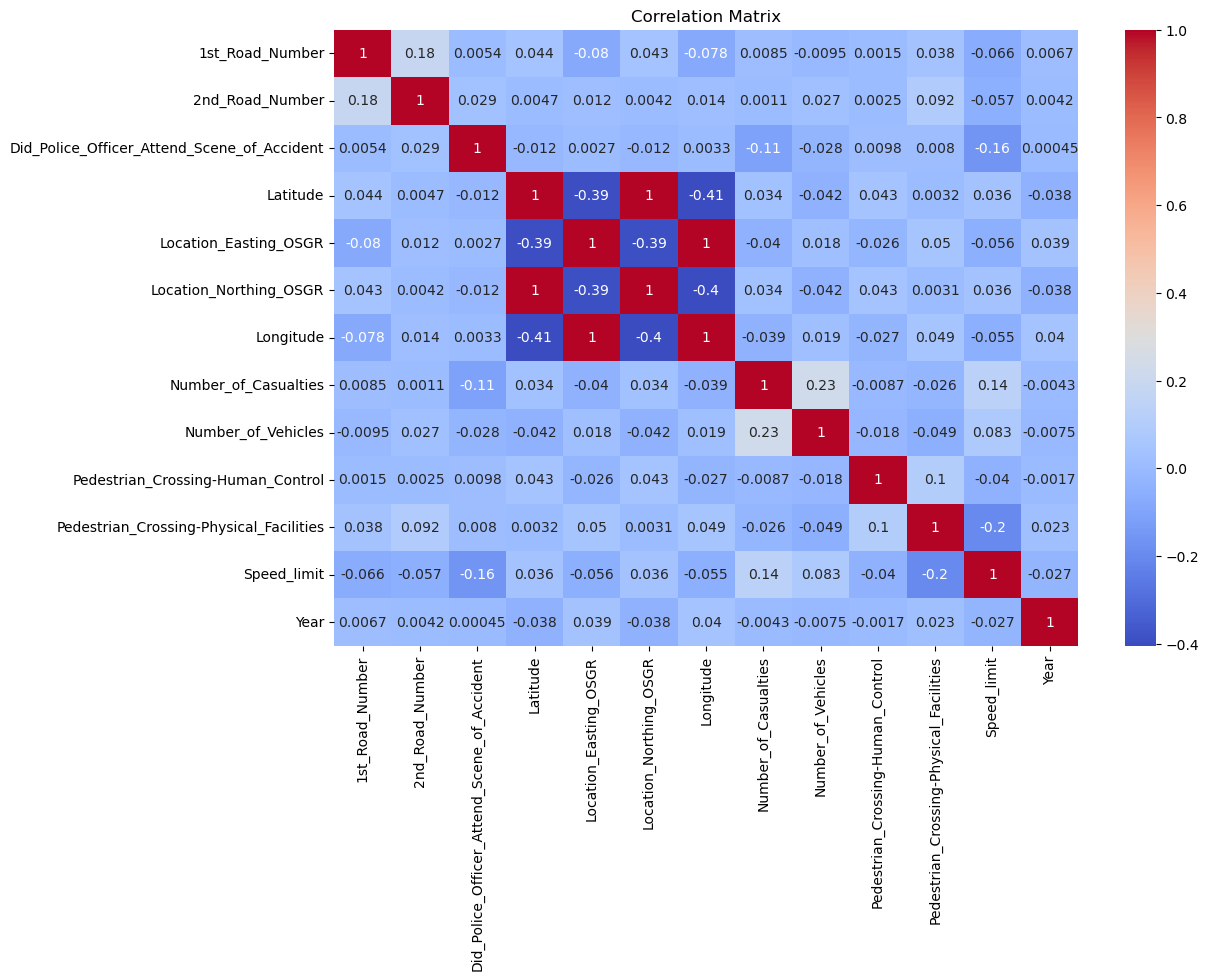

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\Hanna\OneDrive - University of Stirling\Dataset\Accident_information.csv'
df = pd.read_csv(file_path)

# Ensure the dataframe is loaded correctly by displaying the first few rows
print(df.head())

# Select only the numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation Analysis
plt.figure(figsize=(12, 8))  # Create a new figure with a specific size (12x8 inches) for the heatmap
correlation_matrix = numerical_df.corr()  # Calculate the correlation matrix for the numerical columns only
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Create a heatmap using Seaborn to visualize the correlation matrix
plt.title('Correlation Matrix')  # Add a title to the heatmap
plt.show()  # Display the heatmap


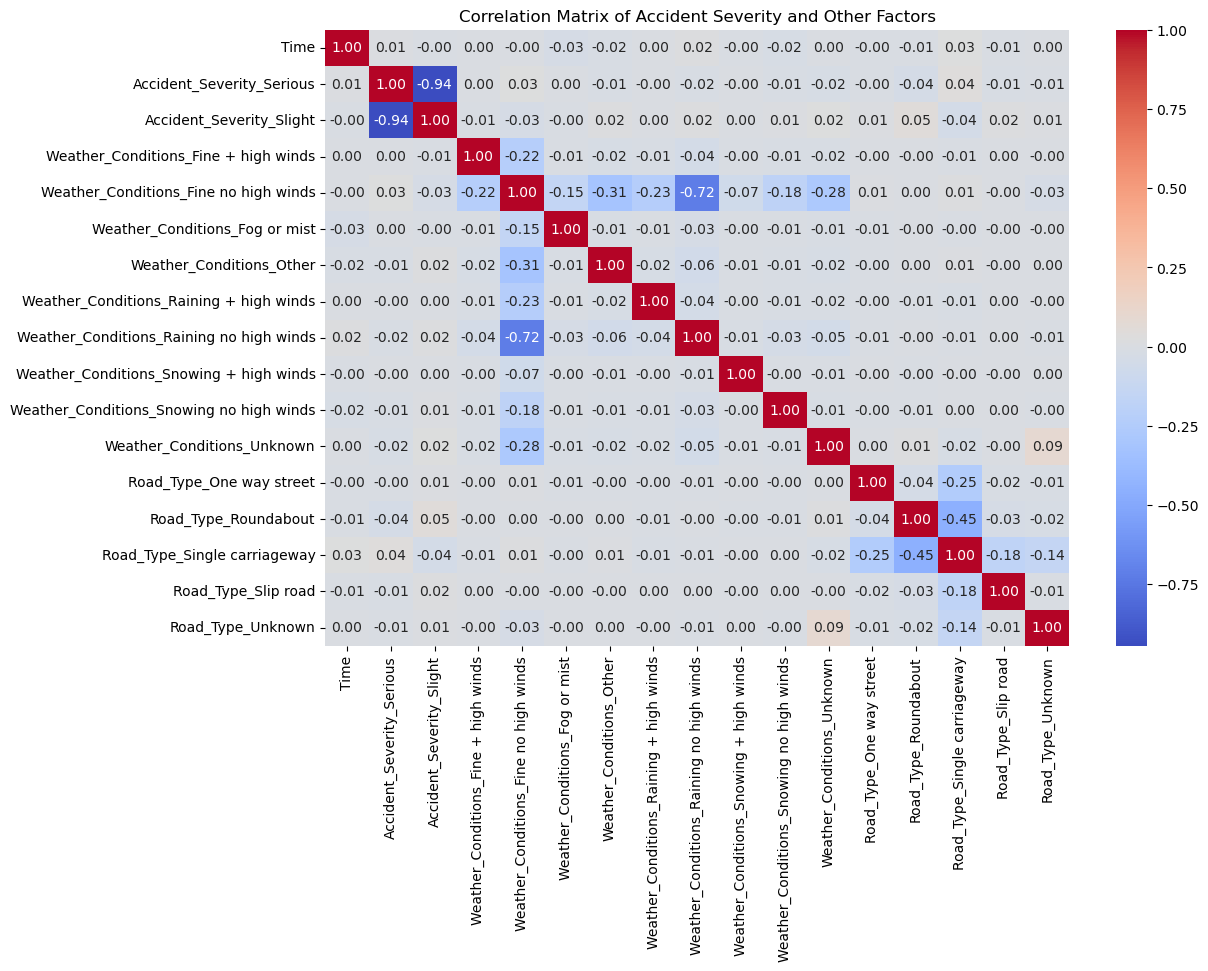

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path =  r'C:\Users\Hanna\OneDrive - University of Stirling\Dataset\Accident_information.csv'
data = pd.read_csv(file_path)

# Convert time to hour of day
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour

# Encode categorical features
data_encoded = pd.get_dummies(data[['Accident_Severity', 'Weather_Conditions', 'Road_Type', 'Time']], drop_first=True)

# Compute correlation matrix
corr_matrix = data_encoded.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Accident Severity and Other Factors')
plt.show()

In [19]:
# printing of Descriptive Statistics information
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       1st_Road_Number  2nd_Road_Number  \
count     1.048573e+06     1.037772e+06   
mean      1.011997e+03     3.870004e+02   
std       1.832042e+03     1.316673e+03   
min       0.000000e+00     0.000000e+00   
25%       0.000000e+00     0.000000e+00   
50%       1.250000e+02     0.000000e+00   
75%       7.060000e+02     0.000000e+00   
max       9.999000e+03     9.999000e+03   

       Did_Police_Officer_Attend_Scene_of_Accident      Latitude  \
count                                 1.048306e+06  1.048464e+06   
mean                                  1.198669e+00  5.257297e+01   
std                                   4.062626e-01  1.424463e+00   
min                                   1.000000e+00  4.991443e+01   
25%                                   1.000000e+00  5.149244e+01   
50%                                   1.000000e+00  5.234314e+01   
75%                                   1.000000e+00  5.346407e+01   
max                                   3.000

In [20]:
# print Mode
print("\nMode:")
print(df.mode().iloc[0])


Mode:
Accident_Index                                                            2.01E+12
1st_Road_Class                                                                   A
1st_Road_Number                                                                0.0
2nd_Road_Class                                                        Unclassified
2nd_Road_Number                                                                0.0
Accident_Severity                                                           Slight
Carriageway_Hazards                                           Other object on road
Date                                                                    21/10/2005
Day_of_Week                                                                 Friday
Did_Police_Officer_Attend_Scene_of_Accident                                    1.0
Junction_Control                                          Give way or uncontrolled
Junction_Detail                                Not at junction or within 20 metr

Text(0.5, 1.0, 'Distribution of Accident Severity')

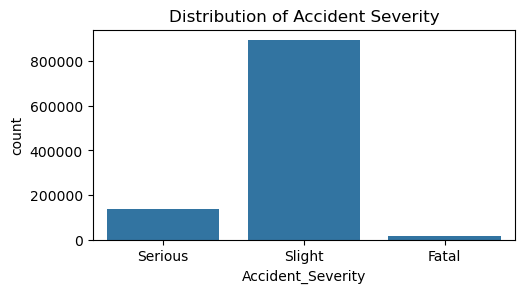

In [22]:
# Visualization
plt.figure(figsize=(12, 6))
# Histogram of Accident Severity
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Accident_Severity')
plt.title('Distribution of Accident Severity')

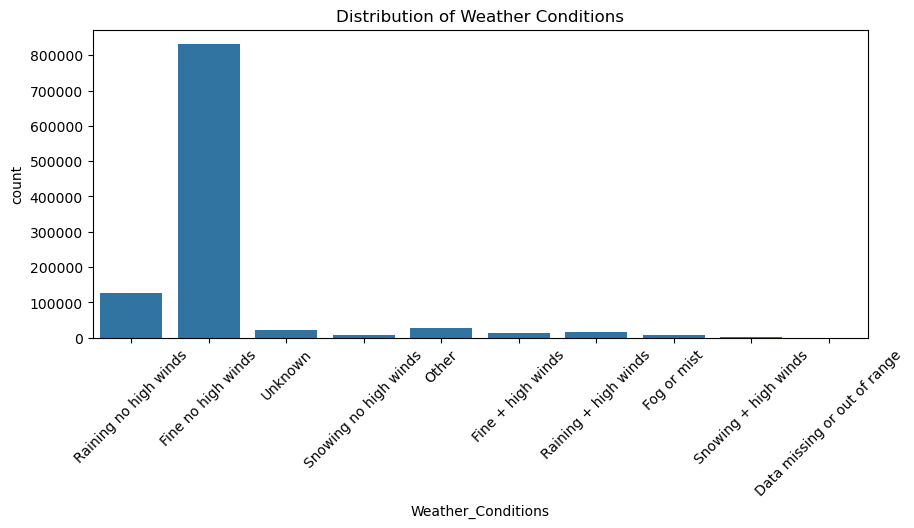

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Weather Conditions
plt.figure(figsize=(10, 4))  # Set the size of the figure to 10 inches wide by 4 inches tall
sns.countplot(data=df, x='Weather_Conditions')  # Create a count plot (a type of histogram) using Seaborn, displaying the count of occurrences for each weather condition
plt.title('Distribution of Weather Conditions')  # Add a title to the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees for better readability
plt.show()  # Display the plot


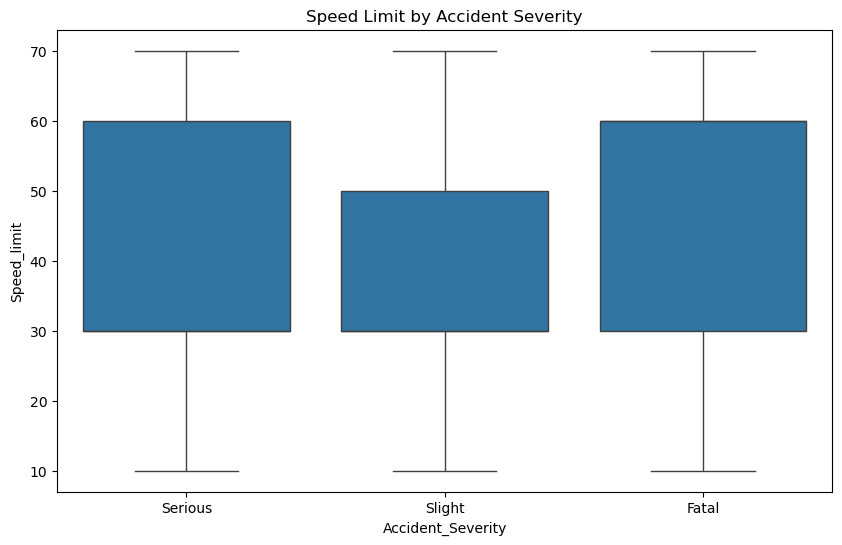

In [24]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Increase the figure size for better readability
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Accident_Severity', y='Speed_limit')
plt.title('Speed Limit by Accident Severity')
plt.show()


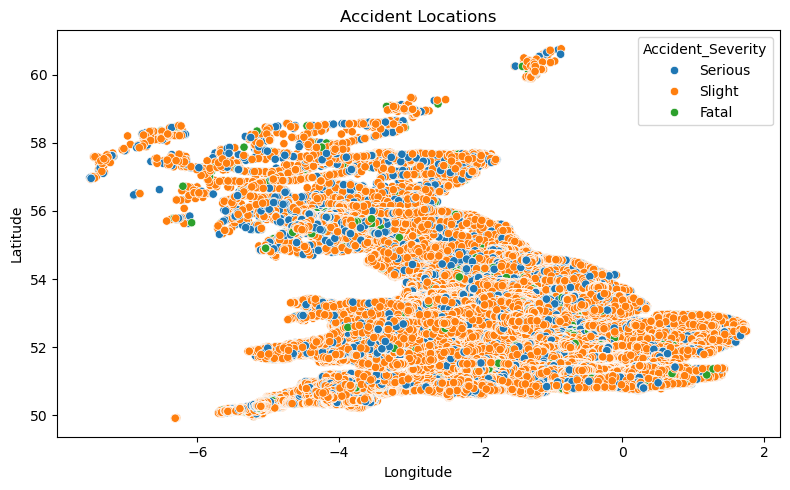

In [25]:
plt.figure(figsize=(8, 5))  # Set the size of the figure to 8 inches wide by 5 inches tall
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Accident_Severity')  # Create a scatter plot with Longitude on the x-axis and Latitude on the y-axis, coloring the points by Accident_Severity
plt.title('Accident Locations')  # Add a title to the plot
plt.tight_layout()  # Adjust the padding between and around subplots to fit the figure area
plt.show()  # Display the plot


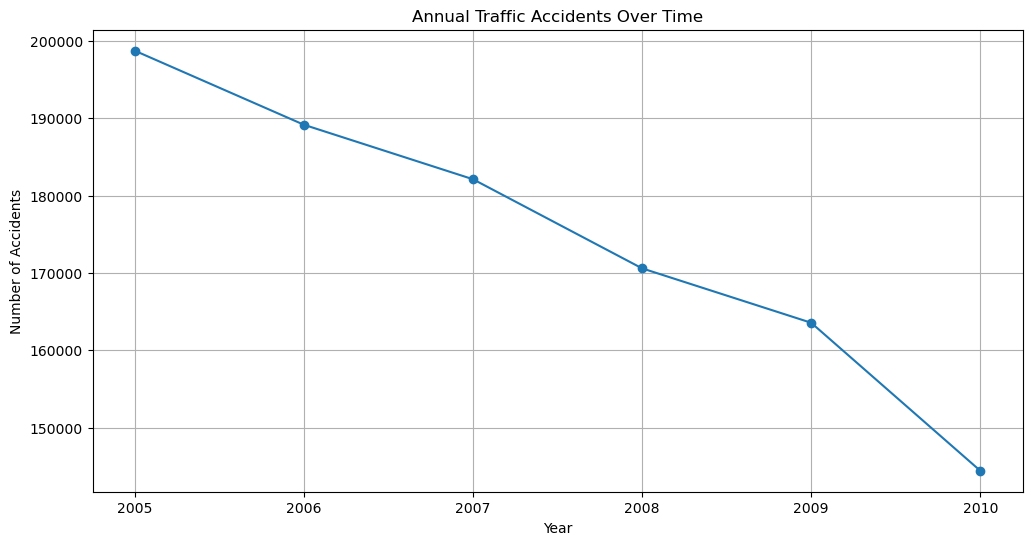

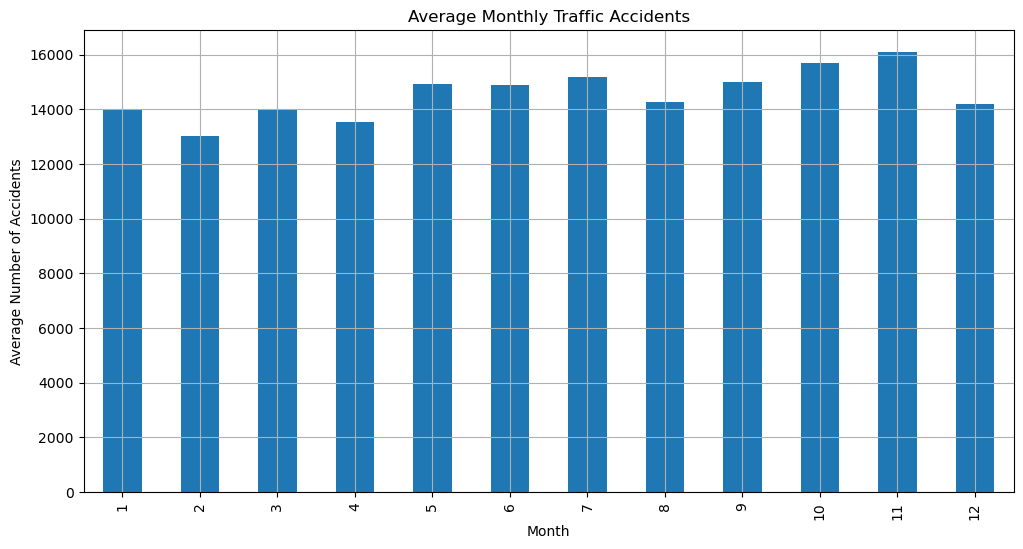

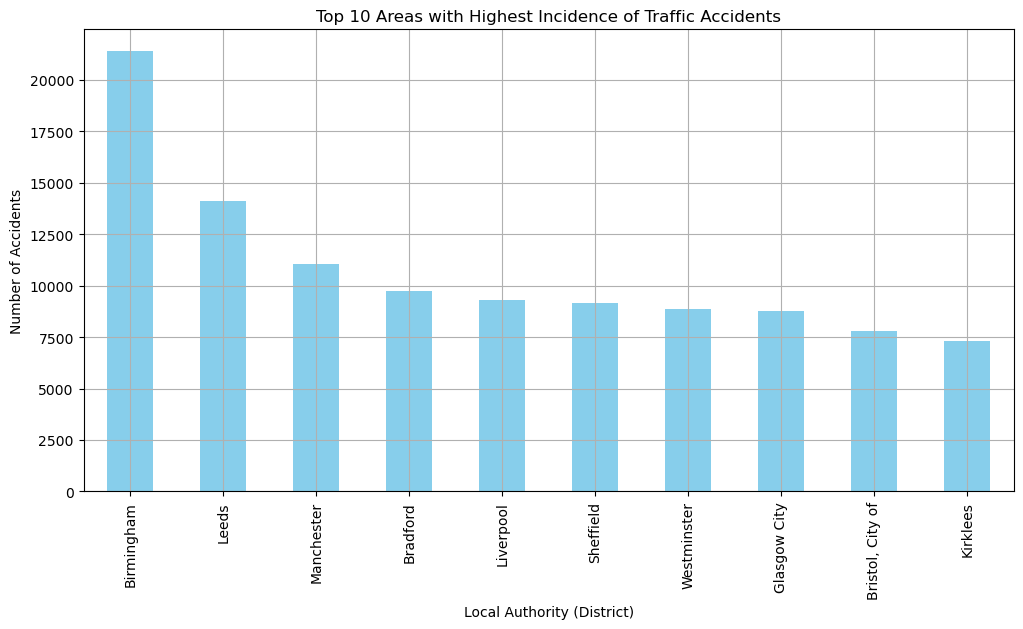

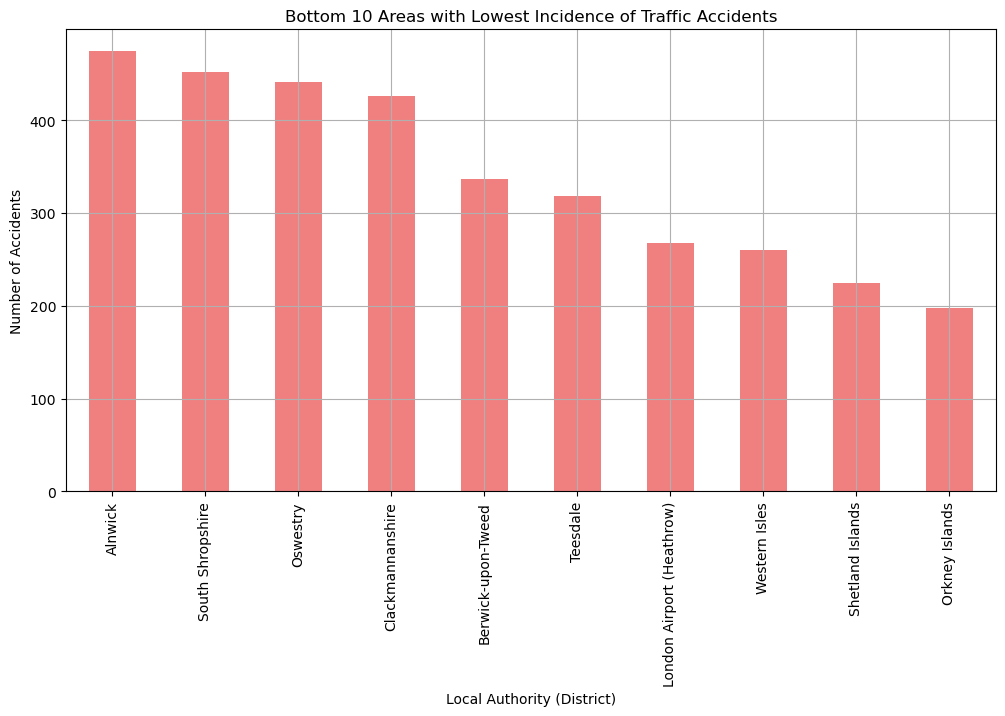

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\Hanna\OneDrive - University of Stirling\Dataset\Accident_information.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extract year and month for further analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Analysis of traffic accidents over time
annual_accidents = df.groupby('Year').size()

plt.figure(figsize=(12, 6))
plt.plot(annual_accidents, marker='o')
plt.title('Annual Traffic Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

# Identify seasonal trends
monthly_accidents = df.groupby(['Year', 'Month']).size().unstack().mean(axis=0)

plt.figure(figsize=(12, 6))
monthly_accidents.plot(kind='bar')
plt.title('Average Monthly Traffic Accidents')
plt.xlabel('Month')
plt.ylabel('Average Number of Accidents')
plt.grid(True)
plt.show()

# Highlight areas in Scotland with highest and lowest incidence of traffic accidents
area_accidents = df['Local_Authority_(District)'].value_counts()

# Plot top 10 and bottom 10 areas
top_areas = area_accidents.head(10)
bottom_areas = area_accidents.tail(10)

plt.figure(figsize=(12, 6))
top_areas.plot(kind='bar', color='skyblue')
plt.title('Top 10 Areas with Highest Incidence of Traffic Accidents')
plt.xlabel('Local Authority (District)')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
bottom_areas.plot(kind='bar', color='lightcoral')
plt.title('Bottom 10 Areas with Lowest Incidence of Traffic Accidents')
plt.xlabel('Local Authority (District)')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()


#### Machine learning with Model

              precision    recall  f1-score   support

           0       0.02      0.00      0.00      4374
           1       0.12      0.00      0.01     41542
           2       0.85      1.00      0.92    268657

    accuracy                           0.85    314573
   macro avg       0.33      0.33      0.31    314573
weighted avg       0.75      0.85      0.79    314573



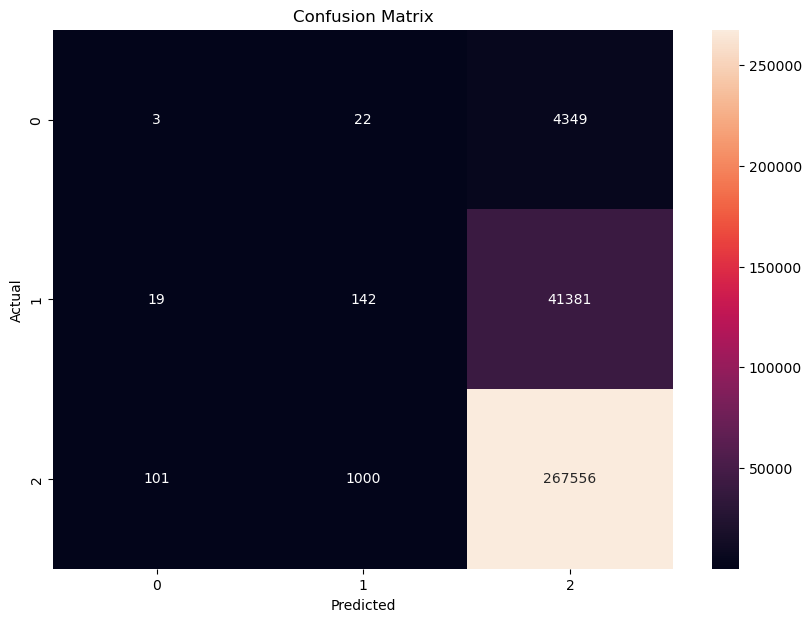

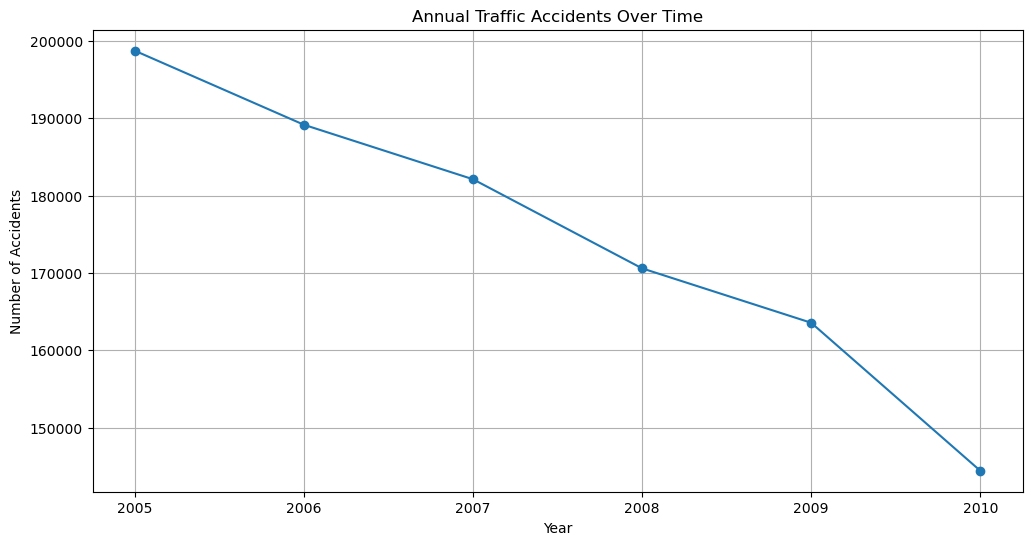

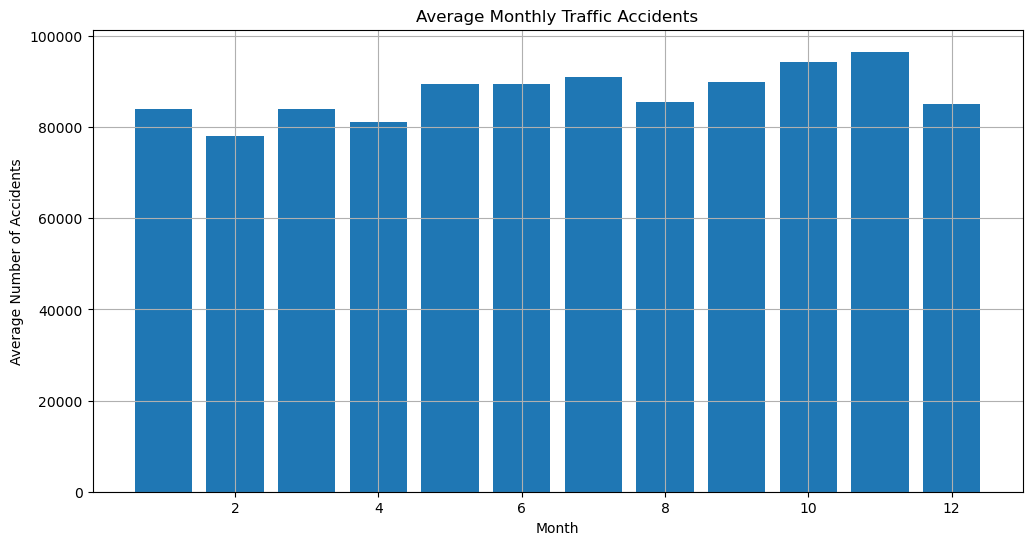

Highest accident area in Scotland: 32834 with 19081 accidents
Lowest accident area in Scotland: 17062 with 1 accidents


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
file_path = r'C:\Users\Hanna\OneDrive - University of Stirling\Dataset\Accident_information.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Handle missing values using forward fill
df.ffill(inplace=True)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extract year, month, and day from 'Date' for further analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Feature selection (ensure these columns exist in your dataset)
features = ['Year', 'Month', 'Day', 'Day_of_Week', 'Speed_limit', 'Weather_Conditions']

# Convert categorical variables to numerical
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Define features and target variable
X = df[features]
y = df['Accident_Severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Time Series Analysis
# Group by year and month to find trends
monthly_accidents = df.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# Plotting annual traffic accidents over time
annual_accidents = df.groupby('Year').size()

plt.figure(figsize=(12, 6))
plt.plot(annual_accidents.index, annual_accidents.values, marker='o')
plt.title('Annual Traffic Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

# Plotting average monthly accidents to find seasonal trends
monthly_avg_accidents = df.groupby('Month').size()

plt.figure(figsize=(12, 6))
plt.bar(monthly_avg_accidents.index, monthly_avg_accidents.values)
plt.title('Average Monthly Traffic Accidents')
plt.xlabel('Month')
plt.ylabel('Average Number of Accidents')
plt.grid(True)
plt.show()

# Geographical Analysis
# Filter data for Scotland
scotland_data = df[df['InScotland'] == 1]  # Assuming InScotland is encoded as 0 and 1

# Group by LSOA (Lower Layer Super Output Area) for detailed analysis
scotland_accidents = scotland_data.groupby('LSOA_of_Accident_Location').size()

# Identify highest and lowest accident areas
highest_accident_area = scotland_accidents.idxmax()
lowest_accident_area = scotland_accidents.idxmin()

print(f'Highest accident area in Scotland: {highest_accident_area} with {scotland_accidents.max()} accidents')
print(f'Lowest accident area in Scotland: {lowest_accident_area} with {scotland_accidents.min()} accidents')


In [29]:
# importing python libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

# Load the data
file_path =  r'C:\Users\Hanna\OneDrive - University of Stirling\Dataset\Accident_information.csv'  # Change to your file path
df = pd.read_csv(file_path)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract Year, Month, and Day from 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Define features and target variable
features = ['Year', 'Month', 'Day', 'Day_of_Week', 'Speed_limit', 'Weather_Conditions', 'Road_Surface_Conditions']
target = 'Accident_Severity'

# Split the data into features (X) and target (y)
X = df[features]
y = df[target]

# Preprocess categorical and numerical features
numeric_features = ['Year', 'Month', 'Day', 'Speed_limit']
categorical_features = ['Day_of_Week', 'Weather_Conditions', 'Road_Surface_Conditions']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the RandomForestClassifier pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8518245367529953
Classification Report:
              precision    recall  f1-score   support

       Fatal       0.04      0.00      0.00      4374
     Serious       0.13      0.00      0.01     41542
      Slight       0.85      1.00      0.92    268657

    accuracy                           0.85    314573
   macro avg       0.34      0.33      0.31    314573
weighted avg       0.75      0.85      0.79    314573

Confusion Matrix:
[[     4     15   4355]
 [    10    106  41426]
 [    81    725 267851]]


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r'C:\Users\Hanna\OneDrive - University of Stirling\Dataset\Accident_information.csv'  # Change to your file path
df = pd.read_csv(file_path)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract Year, Month, and Day from 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Define features and target variable
features = ['Year', 'Month', 'Day', 'Day_of_Week', 'Speed_limit', 'Weather_Conditions', 'Road_Surface_Conditions']
target = 'Accident_Severity'

# Split the data into features (X) and target (y)
X = df[features]
y = df[target]

# Preprocess categorical and numerical features
numeric_features = ['Year', 'Month', 'Day', 'Speed_limit']
categorical_features = ['Day_of_Week', 'Weather_Conditions', 'Road_Surface_Conditions']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the entire dataset before splitting
X_preprocessed = preprocessor.fit_transform(X)

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)

# Use SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Create a pipeline with XGBoost
clf = Pipeline(steps=[('classifier', XGBClassifier(random_state=42))])

# Train the model with hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 6, 9],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters
best_params = grid_search.best_params_

# Predict the test set results
y_pred = grid_search.predict(X_test)

# Evaluate the model
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

best_params, classification_rep


ValueError: 
All the 54 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hanna\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Hanna\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "C:\Users\Hanna\anaconda3\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Hanna\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['Fatal' 'Serious' 'Slight']


In [ ]:
# to install the XGBoost Python package, 
# XGBoost (eXtreme Gradient Boosting),  is known for its performance and accuracy in various machine learning competitions and real-world applications 
!pip install xgboost